In [53]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [54]:
import cfd
import cfdcc
import cfdplot
import cfdsim
import numpy as np

In [55]:
def l2(y_true, y_2):
    return np.sqrt(sum([(y_true[k] - y_2[k])**2 for k in range(len(y_true))]))

def linf(y_true, y_2):
    return max([abs(y_true[k] - y_2[k]) for k in range(len(y_true))])

In [56]:
def test_sim(sim: cfd.Simulation):
    use_mode = sim.param["mode"]

    psi_l2s = []
    psi_linfs = []
    w_l2s = []
    w_linfs = []
    u_l2s = []
    u_linfs = []
    v_l2s = []
    v_linfs = []

    sim.prepare()
    sim.param["mode"] = "lin-seg-np"
    cfdsim.perform_sim(sim)
    np_qties = [sim.calculated_qty(i) for i in range(sim.calculated_qty_count())]

    sim.prepare()
    sim.param["mode"] = use_mode
    cfdsim.perform_sim(sim)
    sim_qties = [sim.calculated_qty(i) for i in range(sim.calculated_qty_count())]

    for i in range(sim.calculated_qty_count()):
        psi_a, w_a, u_a, v_a = np_qties[i]
        psi_b, w_b, u_b, v_b = sim_qties[i]

        psi_l2s.append(l2(psi_a, psi_b))
        psi_linfs.append(linf(psi_a, psi_b))

        w_l2s.append(l2(w_a, w_b))
        w_linfs.append(linf(w_a, w_b))

        u_l2s.append(l2(u_a, u_b))
        u_linfs.append(linf(u_a, u_b))

        v_l2s.append(l2(v_a, v_b))
        v_linfs.append(linf(v_a, v_b))

        print(f"[{i}] psi-L2={psi_l2s[i]:.3f}, psi-Linf={psi_linfs[i]:.3f} | w-L2={w_l2s[i]:.3f}, w-Linf={w_linfs[i]:.3f} | u-L2={u_l2s[i]:.3f}, u-Linf={u_linfs[i]:.3f} | v-L2={v_l2s[i]:.3f}, v-Linf={v_linfs[i]:.3f}")

    return (psi_l2s, psi_linfs, w_l2s, w_linfs, u_l2s, u_linfs, v_l2s, v_linfs)

In [57]:
sim = cfd.Simulation({
    "log": 0,
    "icbc": "ldc",
    "Nx": 7, "Ny": 7,
    "Lx": 1.0, "Ly": 1.0,
    "T": 30, "dt": 0.1,
    "nu": 0.1,
    "rho": 1.0,

    "mode": "lin-seg-qubo",

    # QUBO
    "qubo-encoding": "dyn",
    "qubo-R": 6,
    "qubo-reads": 1,
    "qubo-strength": 5.0,
    "qubo-chimera-plot": False,
    "qubo-dyn-t-order": 2,
    "qubo-dyn-intv-size": 0,
    "qubo-dyn-psi-base": 1e-5,
    "qubo-dyn-w-base": 1e-7
})

psi_l2s, psi_linfs, w_l2s, w_linfs, u_l2s, u_linfs, v_l2s, v_linfs = test_sim(sim)

C(1/30): cx=0.000, cy=0.000
C(2/30): cx=0.231, cy=0.151
C(3/30): cx=0.379, cy=0.253
C(4/30): cx=0.371, cy=0.234
C(5/30): cx=0.300, cy=0.170
C(6/30): cx=0.266, cy=0.144
C(7/30): cx=0.282, cy=0.163
C(8/30): cx=0.308, cy=0.187
C(9/30): cx=0.316, cy=0.192
C(10/30): cx=0.307, cy=0.182
C(11/30): cx=0.297, cy=0.173
C(12/30): cx=0.296, cy=0.173
C(13/30): cx=0.301, cy=0.178
C(14/30): cx=0.304, cy=0.181
C(15/30): cx=0.304, cy=0.180
C(16/30): cx=0.302, cy=0.178
C(17/30): cx=0.301, cy=0.177
C(18/30): cx=0.301, cy=0.178
C(19/30): cx=0.302, cy=0.179
C(20/30): cx=0.302, cy=0.179
C(21/30): cx=0.302, cy=0.178
C(22/30): cx=0.302, cy=0.178
C(23/30): cx=0.302, cy=0.178
C(24/30): cx=0.302, cy=0.178
C(25/30): cx=0.302, cy=0.178
C(26/30): cx=0.302, cy=0.178
C(27/30): cx=0.302, cy=0.178
C(28/30): cx=0.302, cy=0.178
C(29/30): cx=0.302, cy=0.178
C(30/30): cx=0.302, cy=0.178
[qubo] Q: max=0.0000, min=0.0000, avg=0.0000
[qubo] Energias: [0.0]
[qubo] Q: max=0.0000, min=0.0000, avg=0.0000
[qubo] Energias: [0.0]
C(1

In [58]:
PLOT_PARAMS = True

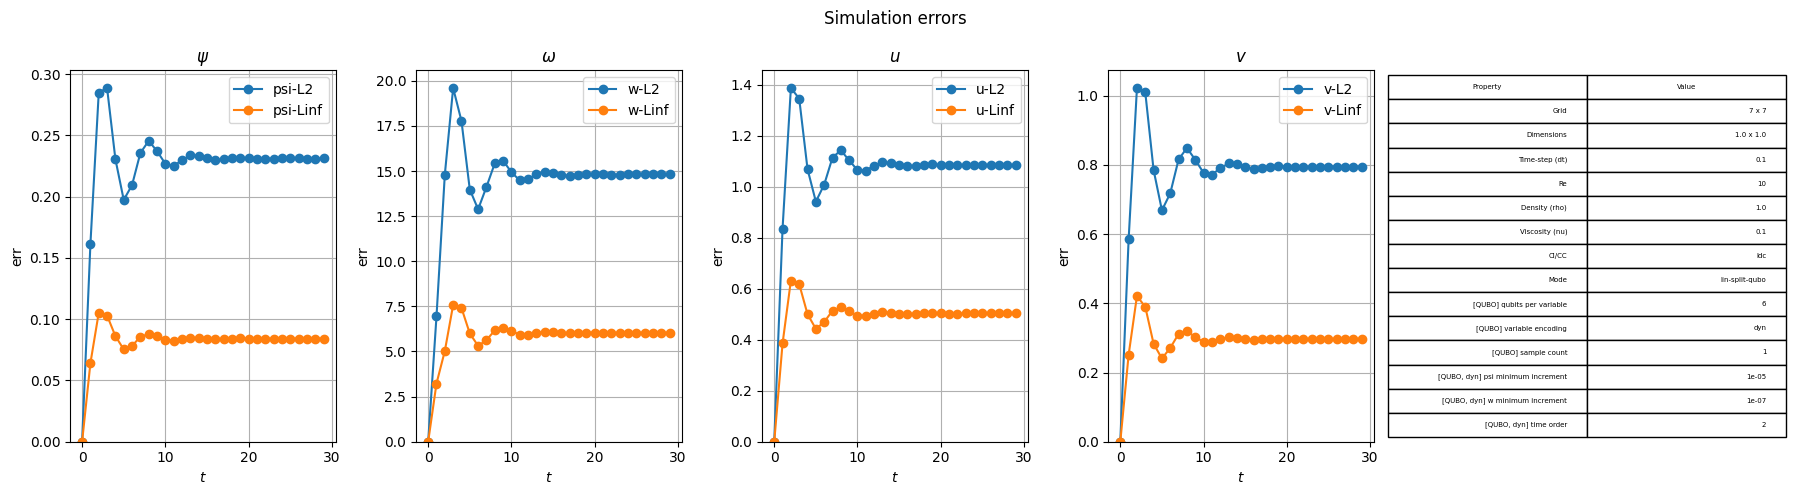

In [59]:
import matplotlib.pyplot as plt

xs = list(range(sim.calculated_qty_count()))
num_axes = 4
if PLOT_PARAMS:
    num_axes += 1
fig, axes = plt.subplots(1, num_axes, figsize=(18,5))

axes[0].plot(xs, psi_l2s, label='psi-L2', marker='o')
axes[0].plot(xs, psi_linfs, label='psi-Linf', marker='o')
axes[0].set_xlabel('$t$')
axes[0].set_ylabel('err')
axes[0].set_title('$\\psi$')
axes[0].legend()
axes[0].grid(True)
ymin, ymax = axes[0].get_ylim()
axes[0].set_ylim(bottom=0, top=ymax)
# axes[0].xaxis.set_major_locator(plt.MultipleLocator(1))

axes[1].plot(xs, w_l2s, label='w-L2', marker='o')
axes[1].plot(xs, w_linfs, label='w-Linf', marker='o')
axes[1].set_xlabel('$t$')
axes[1].set_ylabel('err')
axes[1].set_title('$\\omega$')
axes[1].legend()
axes[1].grid(True)
ymin, ymax = axes[1].get_ylim()
axes[1].set_ylim(bottom=0, top=ymax)
# axes[1].xaxis.set_major_locator(plt.MultipleLocator(1))

axes[2].plot(xs, u_l2s, label='u-L2', marker='o')
axes[2].plot(xs, u_linfs, label='u-Linf', marker='o')
axes[2].set_xlabel('$t$')
axes[2].set_ylabel('err')
axes[2].set_title('$u$')
axes[2].legend()
axes[2].grid(True)
ymin, ymax = axes[2].get_ylim()
axes[2].set_ylim(bottom=0, top=ymax)
# axes[2].xaxis.set_major_locator(plt.MultipleLocator(1))

axes[3].plot(xs, v_l2s, label='v-L2', marker='o')
axes[3].plot(xs, v_linfs, label='v-Linf', marker='o')
axes[3].set_xlabel('$t$')
axes[3].set_ylabel('err')
axes[3].set_title('$v$')
axes[3].legend()
axes[3].grid(True)
ymin, ymax = axes[3].get_ylim()
axes[3].set_ylim(bottom=0, top=ymax)
# axes[3].xaxis.set_major_locator(plt.MultipleLocator(1))

if PLOT_PARAMS:
    params = sim.gen_display_params([])
    axes[4].axis("off")
    cell_text = [[k, v] for k, v in params.items()]
    table = axes[4].table(cellText=cell_text, colLabels=["Property", "Value"], loc='center')
    table.scale(1.5, 1.5)

fig.suptitle("Simulation errors")

plt.tight_layout()
plt.savefig(f"err-var/err-{sim.param['icbc']}-R-qubo-dyn.png")
plt.show()